# Iniciando una rutina típica de manejo de datos (27/29)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df_temp = pd.read_csv('./pandas/GlobalLandTemperaturesByCountry.csv')
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [3]:
df_temp.shape # Para saber el tamaño de la base de datos en filas

(577462, 4)

In [4]:
df_temp.info() # Ver como esta compuesta la base de datos (informacion)    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [5]:
df_temp['Country'].unique() # Ver los que contiene la tabla paises sin repetir

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [6]:
df_temp['Year'] = pd.to_datetime(df_temp['dt']) # Creando una nueva columna con la fecha año y su formato adecuado

In [7]:
df_temp


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01,4.384,2.294,Åland,1743-11-01
1,1743-12-01,NaN,NaN,Åland,1743-12-01
2,1744-01-01,NaN,NaN,Åland,1744-01-01
3,1744-02-01,NaN,NaN,Åland,1744-02-01
4,1744-03-01,NaN,NaN,Åland,1744-03-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [8]:
idx = df_temp['Year'] > pd.to_datetime('1970-01-01') # Creando un filtro para que todos los datos que se muestren sean mayor a 1970-01-01
df_temp = df_temp[idx] # La variable idx se guarda en df_temp en otra variable
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
2715,1970-02-01,-10.835,0.478,Åland,1970-02-01
2716,1970-03-01,-1.583,0.608,Åland,1970-03-01
2717,1970-04-01,0.493,0.463,Åland,1970-04-01
2718,1970-05-01,6.939,0.565,Åland,1970-05-01
2719,1970-06-01,14.252,0.676,Åland,1970-06-01
...,...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe,2013-05-01
577458,2013-06-01,17.613,0.473,Zimbabwe,2013-06-01
577459,2013-07-01,17.000,0.453,Zimbabwe,2013-07-01
577460,2013-08-01,19.759,0.717,Zimbabwe,2013-08-01


In [10]:
df_t_avg = df_temp.groupby(['Country', pd.Grouper(key='Year', freq='1Y')]).agg({'AverageTemperature':[np.mean, np.median]}) # por pais con toma del dato del año con una frecuencia del 1 año se creen dos columnas con la media y la mediana 
df_t_avg

AverageTemperature         
                                     mean   median
Country     Year                                  
Afghanistan 1970-12-31          16.005455  16.1990
            1971-12-31          14.823500  14.9340
            1972-12-31          12.547167  13.8725
            1973-12-31          14.235500  14.9130
            1974-12-31          13.316750  13.6160
...                                   ...      ...
Åland       2009-12-31           6.489083   5.5765
            2010-12-31           4.861917   4.7550
            2011-12-31           7.170750   7.4990
            2012-12-31           6.063917   6.2540
            2013-12-31           6.229750   6.0140

[10692 rows x 2 columns]

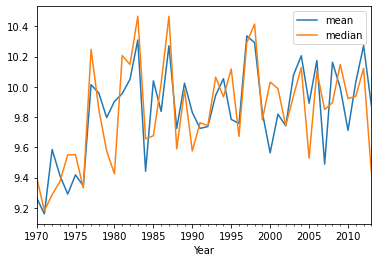

In [12]:
df_t_avg.xs('Chile')['AverageTemperature'].plot() # Seleccionar un pais en particular

In [13]:
pd.options.display.float_format='{:.2f}'.format # con esto podemos definir los decimales que necesitamos

In [14]:
df_tmed = df_t_avg['AverageTemperature'][['median']].reset_index()
df_tmed

,Country,Year,median
0,Afghanistan,1970-12-31,16.20
1,Afghanistan,1971-12-31,14.93
2,Afghanistan,1972-12-31,13.87
3,Afghanistan,1973-12-31,14.91
4,Afghanistan,1974-12-31,13.62
...,...,...,...
10687,Åland,2009-12-31,5.58
10688,Åland,2010-12-31,4.76
10689,Åland,2011-12-31,7.50
10690,Åland,2012-12-31,6.25


In [15]:
df_tmed['date'] = df_tmed['Year'].dt.year # Para extraer el año 
df_tmed

,Country,Year,median,date
0,Afghanistan,1970-12-31,16.20,1970
1,Afghanistan,1971-12-31,14.93,1971
2,Afghanistan,1972-12-31,13.87,1972
3,Afghanistan,1973-12-31,14.91,1973
4,Afghanistan,1974-12-31,13.62,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.58,2009
10688,Åland,2010-12-31,4.76,2010
10689,Åland,2011-12-31,7.50,2011
10690,Åland,2012-12-31,6.25,2012


In [16]:
df_tmed.rename(columns={'median':'temperature'}, inplace=True) # Renombrar la columna 
df_tmed

,Country,Year,temperature,date
0,Afghanistan,1970-12-31,16.20,1970
1,Afghanistan,1971-12-31,14.93,1971
2,Afghanistan,1972-12-31,13.87,1972
3,Afghanistan,1973-12-31,14.91,1973
4,Afghanistan,1974-12-31,13.62,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.58,2009
10688,Åland,2010-12-31,4.76,2010
10689,Åland,2011-12-31,7.50,2011
10690,Åland,2012-12-31,6.25,2012


In [17]:
df_t_pivot = df_tmed.pivot_table(values='temperature', index='date', columns='Country') # Creando una nueva columna con datos que los valores sean las temperaduras, las filas por la fecha y las columnas por pais
df_t_pivot

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
1970,16.20,25.24,12.42,23.28,26.72,11.64,22.96,27.15,27.22,15.12,...,15.76,15.54,25.28,24.63,26.72,23.82,27.44,22.13,23.26,6.93
1971,14.93,24.78,11.67,22.78,26.48,11.93,22.46,26.53,26.38,14.77,...,16.55,12.99,24.65,24.11,26.25,20.27,26.51,21.83,22.71,4.49
1972,13.87,25.12,11.22,22.50,26.82,10.03,22.61,26.91,26.77,14.34,...,16.92,13.56,25.26,24.52,26.62,21.39,26.82,21.98,22.40,5.62
1973,14.91,25.34,11.84,23.00,27.01,9.55,23.07,27.34,27.17,14.87,...,17.54,13.47,25.20,25.01,27.07,22.92,27.23,22.11,22.58,3.58
1974,13.62,24.83,11.32,21.58,26.63,8.20,22.33,26.60,26.52,15.22,...,17.40,13.21,25.08,24.37,26.17,21.58,26.63,21.60,21.33,5.46
1975,13.51,24.80,12.36,23.07,26.65,10.41,22.42,26.48,26.33,15.15,...,17.18,13.34,24.98,24.99,26.30,20.52,26.12,21.86,21.79,6.02
1976,14.16,24.82,12.61,22.30,26.62,9.66,22.15,26.98,26.84,14.40,...,16.57,11.38,25.06,24.47,26.66,20.46,26.32,21.70,21.99,4.39
1977,15.66,25.03,11.99,23.54,26.71,10.41,22.60,27.20,27.01,15.97,...,18.35,13.80,25.62,24.63,26.89,22.68,26.88,22.17,22.29,5.47
1978,15.26,24.91,11.55,22.56,26.73,9.76,22.71,27.23,27.04,15.34,...,17.17,13.30,25.56,24.43,26.97,21.77,27.01,22.10,22.62,5.75


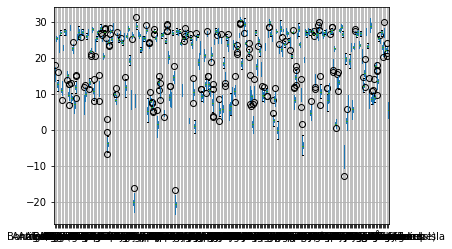

In [18]:
df_t_pivot.boxplot()

In [19]:
df_t_pivot.sample(2) # Seleccionar datos aleatorios (años)

Country,Afghanistan,Africa,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua And Barbuda,Argentina,...,Uruguay,Uzbekistan,Venezuela,Vietnam,Virgin Islands,Western Sahara,Yemen,Zambia,Zimbabwe,Åland
date,,,,,,,,,,,,,,,,,,,,,
2007,15.48,25.70,13.18,24.31,27.48,12.35,22.91,27.82,27.47,15.94,...,18.94,13.84,25.67,24.52,27.49,23.04,27.66,22.24,22.91,6.30
1991,14.39,25.29,11.59,23.03,27.08,9.97,22.45,27.13,26.91,14.92,...,17.54,14.68,25.50,24.61,26.79,22.20,27.05,22.38,23.33,5.47


In [20]:
df_t_pivot.T.sample(2)  # Seleccionar datos aleatorios (paises), T es transpuesto eso quiere decir que se intercambia entre columna y filas

date,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Morocco,17.88,15.52,16.44,17.18,15.36,16.23,15.82,17.77,16.74,16.85,...,17.36,19.11,19.60,17.77,18.27,18.66,18.97,19.27,17.83,18.68
Singapore,26.90,26.73,26.98,26.89,26.81,26.71,26.65,26.87,26.84,26.92,...,27.18,27.61,27.39,27.14,27.10,27.56,27.42,27.26,27.23,27.63


In [21]:
df_t_pivot.T.sample(2).T.head(4)

Country,Grenada,Taiwan
date,,
1970,27.18,24.22
1971,26.62,22.18
1972,27.20,23.06
1973,27.21,23.26


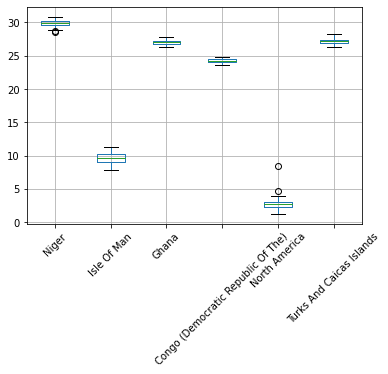

In [22]:
df_t_pivot.T.sample(6).T.boxplot(rot=45)

# Preprocesamiento de datos: terminando de preparar y limpiar los datasets (28/29)

In [24]:
df_agri = pd.read_csv('./DB_clima/agricultura.csv', header = 2)
df_fore = pd.read_csv('./DB_clima/forestacion.csv', header = 2)
df_elec = pd.read_csv('./DB_clima/consumo_electricidad.csv', header = 2)
df_co2e = pd.read_csv('./DB_clima/co2e.csv', header = 2)
df_popu = pd.read_csv('./DB_clima/poblacion.csv', header = 2)

In [25]:
df_popu

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.00,55438.00,56225.00,56695.00,57032.00,57360.00,...,102046.00,102560.00,103159.00,103774.00,104341.00,104872.00,105366.00,105845.00,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.00,9169410.00,9351441.00,9543205.00,9744781.00,9956320.00,...,30117413.00,31161376.00,32269589.00,33370794.00,34413603.00,35383128.00,36296400.00,37172386.00,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.00,5531472.00,5608539.00,5679458.00,5735044.00,5770570.00,...,24220661.00,25107931.00,26015780.00,26941779.00,27884381.00,28842484.00,29816748.00,30809762.00,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.00,1659800.00,1711319.00,1762621.00,1814135.00,1864791.00,...,2905195.00,2900401.00,2895092.00,2889104.00,2880703.00,2876101.00,2873457.00,2866376.00,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.00,14375.00,15370.00,16412.00,17469.00,18549.00,...,83747.00,82427.00,80774.00,79213.00,78011.00,77297.00,77001.00,77006.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.00,966000.00,994000.00,1022000.00,1050000.00,1078000.00,...,1791000.00,1805200.00,1824100.00,1821800.00,1801800.00,1816200.00,1830700.00,1845300.00,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.00,5393036.00,5473671.00,5556766.00,5641597.00,5727751.00,...,23807588.00,24473178.00,25147109.00,25823485.00,26497889.00,27168210.00,27834821.00,28498687.00,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.00,17524533.00,17965725.00,18423161.00,18896307.00,19384841.00,...,52004172.00,52834005.00,53689236.00,54545991.00,55386367.00,56203654.00,57000451.00,57779622.00,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.00,3164329.00,3260650.00,3360104.00,3463213.00,3570464.00,...,14023193.00,14465121.00,14926504.00,15399753.00,15879361.00,16363507.00,16853688.00,17351822.00,NaN,NaN


In [35]:
range(1971,2015)
map(str,range(1971,2015)) # Generando una lista de string con los años seleccionados
cols =['Country Name','Country Code']  + list(map(str,range(1971,2015))) # Columnas a utilizar
cols[:5] # seleccionando las primeras 5 columnas

['Country Name', 'Country Code', '1971', '1972', '1973']

In [31]:
list(map(str,range(1971,2015))) # listando la lista de string(formato tipo texto)

['1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [38]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']) # las variables que quiero mantener (todos los años hacen parte de una misma columna hacia abajo)

,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.00
1,Afghanistan,AFG,1971,380360.00
2,Angola,AGO,1971,574000.00
3,Albania,ALB,1971,12000.00
4,Andorra,AND,1971,250.00
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.00
11613,South Africa,ZAF,2014,968410.00
11614,Zambia,ZMB,2014,238360.00


In [39]:
df_agri.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
    columns={'variable':'date',
             'Country Name':'Country',
             'Country Code':'name',
             'value':'agriculture'})

,Country,name,date,agriculture
0,Aruba,ABW,1971,20.00
1,Afghanistan,AFG,1971,380360.00
2,Angola,AGO,1971,574000.00
3,Albania,ALB,1971,12000.00
4,Andorra,AND,1971,250.00
...,...,...,...,...
11611,Kosovo,XKX,2014,NaN
11612,"Yemen, Rep.",YEM,2014,235460.00
11613,South Africa,ZAF,2014,968410.00
11614,Zambia,ZMB,2014,238360.00


In [40]:
def fun_format(df, col = 'agriculture'):
  return df.loc[:,cols].melt(id_vars=['Country Name','Country Code']).rename(
      columns={'variable':'date',
              'Country Name':'Country',
              'Country Code':'name',
              'value':col})

In [41]:
df_agri = fun_format(df_agri, col = 'agriculture')
df_fore = fun_format(df_fore, col = 'forest')
df_elec = fun_format(df_elec, col = 'electricprod')
df_co2e = fun_format(df_co2e, col = 'co2')
df_popu = fun_format(df_popu, col = 'population')
df_popu

,Country,name,date,population
0,Aruba,ABW,1971,59440.00
1,Afghanistan,AFG,1971,11475445.00
2,Angola,AGO,1971,6040777.00
3,Albania,ALB,1971,2187853.00
4,Andorra,AND,1971,25559.00
...,...,...,...,...
11611,Kosovo,XKX,2014,1821800.00
11612,"Yemen, Rep.",YEM,2014,25823485.00
11613,South Africa,ZAF,2014,54545991.00
11614,Zambia,ZMB,2014,15399753.00


In [42]:
df_tmed

,Country,Year,temperature,date
0,Afghanistan,1970-12-31,16.20,1970
1,Afghanistan,1971-12-31,14.93,1971
2,Afghanistan,1972-12-31,13.87,1972
3,Afghanistan,1973-12-31,14.91,1973
4,Afghanistan,1974-12-31,13.62,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.58,2009
10688,Åland,2010-12-31,4.76,2010
10689,Åland,2011-12-31,7.50,2011
10690,Åland,2012-12-31,6.25,2012


In [43]:
df_popu['date'] = df_popu['date'].astype(float) # Cambiando el tipo de datos en este caso es flotante (float)
df_fore['date'] = df_fore['date'].astype(float)
df_agri['date'] = df_agri['date'].astype(float)
df_elec['date'] = df_elec['date'].astype(float)
df_co2e['date'] = df_co2e['date'].astype(float)
df_popu.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11616 non-null  object 
 1   name        11616 non-null  object 
 2   date        11616 non-null  float64
 3   population  11501 non-null  float64
dtypes: float64(2), object(2)
memory usage: 363.1+ KB


In [44]:
df_merge = pd.merge(df_tmed[['Country','temperature','date']],
                    df_popu, on = ['Country','date'], how = 'inner')
                    # Juntando los dataframe

In [45]:
df_merge

,Country,temperature,date,name,population
0,Afghanistan,14.93,1971,AFG,11475445.00
1,Afghanistan,13.87,1972,AFG,11791215.00
2,Afghanistan,14.91,1973,AFG,12108963.00
3,Afghanistan,13.62,1974,AFG,12412950.00
4,Afghanistan,13.51,1975,AFG,12689160.00
...,...,...,...,...,...
7219,Zimbabwe,22.49,2009,ZWE,12526968.00
7220,Zimbabwe,23.30,2010,ZWE,12697723.00
7221,Zimbabwe,22.94,2011,ZWE,12894316.00
7222,Zimbabwe,23.05,2012,ZWE,13115131.00


In [46]:
df_merge = pd.merge(df_merge,
                    df_co2e,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_elec,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_agri,
                    on = ['Country','name','date'],
                    how = 'inner')

df_merge = pd.merge(df_merge,
                    df_fore,
                    on = ['Country','name','date'],
                    how = 'inner')
df_merge # Obteniendo un nuevo dataframe con los datos unidos de las distintas bases de datos 

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.93,1971,AFG,11475445.00,1895.84,NaN,380360.00,NaN
1,Afghanistan,13.87,1972,AFG,11791215.00,1532.81,NaN,380460.00,NaN
2,Afghanistan,14.91,1973,AFG,12108963.00,1639.15,NaN,380480.00,NaN
3,Afghanistan,13.62,1974,AFG,12412950.00,1917.84,NaN,380480.00,NaN
4,Afghanistan,13.51,1975,AFG,12689160.00,2126.86,NaN,380480.00,NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.49,2009,ZWE,12526968.00,5603.18,585.46,163000.00,159510.00
7220,Zimbabwe,23.30,2010,ZWE,12697723.00,7777.71,606.64,162000.00,156240.00
7221,Zimbabwe,22.94,2011,ZWE,12894316.00,9563.54,636.25,164000.00,153116.00
7222,Zimbabwe,23.05,2012,ZWE,13115131.00,7792.38,608.76,162000.00,149992.00


In [47]:
df_merge.dropna()

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
62,Albania,13.45,1990,ALB,3286542.00,5515.17,552.25,11210.00,7888.00
63,Albania,11.59,1991,ALB,3266790.00,4286.72,418.45,11270.00,7868.50
64,Albania,13.59,1992,ALB,3247039.00,2515.56,453.64,11270.00,7849.00
65,Albania,13.65,1993,ALB,3227287.00,2335.88,536.36,11260.00,7829.50
66,Albania,13.24,1994,ALB,3207536.00,1925.17,596.41,11260.00,7810.00
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.49,2009,ZWE,12526968.00,5603.18,585.46,163000.00,159510.00
7220,Zimbabwe,23.30,2010,ZWE,12697723.00,7777.71,606.64,162000.00,156240.00
7221,Zimbabwe,22.94,2011,ZWE,12894316.00,9563.54,636.25,164000.00,153116.00
7222,Zimbabwe,23.05,2012,ZWE,13115131.00,7792.38,608.76,162000.00,149992.00


# Análisis de datos (29/29)

In [48]:
df_climate = df_merge.dropna()

In [53]:
df_climate.groupby('Country')['co2'].median().sort_values(ascending=False) # Cuales son los paises que producen mas CO2 de mayor a menor 

Country
North America   5,886,299.6
United States   5,382,123.7
China           3,668,917.8
Japan           1,202,082.9
India           1,047,705.9
                    ...    
Haiti               1,652.0
Mozambique          1,584.1
Togo                1,285.3
Niger                 784.7
Eritrea               614.2
Name: co2, Length: 120, dtype: float64

In [50]:
pd.set_option('display.float_format', '{:,.1f}'.format) # Para quitar los decimales de notacion cientificas

In [51]:
first_10 = df_climate.groupby('Country')['co2'].median().sort_values(ascending=False).head(10).index # Cuales son los 10 paises que producen mas CO2
first_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [52]:
df_max_co2 = df_climate[df_climate['Country'].isin([ 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'])]
df_max_co2

,Country,temperature,date,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.6,1990,CAN,"27,691,138.0","435,181.2","16,167.4","677,680.0","3,482,730.0"
1267,Canada,-4.2,1991,CAN,"28,037,420.0","426,780.1","16,181.6","677,530.0","3,482,259.1"
1268,Canada,-5.0,1992,CAN,"28,371,264.0","440,978.8","16,164.4","678,140.0","3,481,788.1"
1269,Canada,-4.0,1993,CAN,"28,684,764.0","445,580.8","16,320.1","678,740.0","3,481,316.9"
1270,Canada,-3.4,1994,CAN,"29,000,663.0","456,849.5","16,388.3","679,340.0","3,480,845.9"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.4,2009,USA,"306,771,529.0","5,263,505.5","12,913.7","4,099,606.9","3,079,274.1"
7005,United States,10.2,2010,USA,"309,326,085.0","5,395,532.1","13,394.9","4,084,261.9","3,087,200.0"
7006,United States,9.5,2011,USA,"311,580,009.0","5,289,680.5","13,246.0","4,046,693.1","3,089,950.0"
7007,United States,9.9,2012,USA,"313,874,218.0","5,119,436.4","12,964.3","4,087,065.0","3,092,700.0"


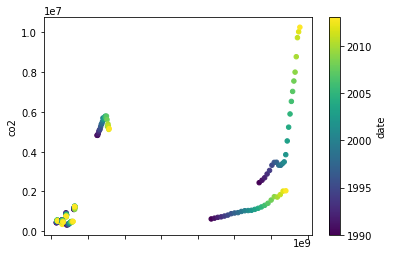

In [54]:
df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='date',
    colormap='viridis')

In [55]:
df_climate.corr() # Nos calcula la correlacion con las variables del df

,temperature,date,population,co2,electricprod,agriculture,forest
temperature,1.0,0.0,-0.0,-0.2,-0.4,-0.1,-0.1
date,0.0,1.0,0.0,0.0,0.1,-0.0,-0.0
population,-0.0,0.0,1.0,0.6,-0.0,0.6,0.4
co2,-0.2,0.0,0.6,1.0,0.2,0.8,0.7
electricprod,-0.4,0.1,-0.0,0.2,1.0,0.1,0.2
agriculture,-0.1,-0.0,0.6,0.8,0.1,1.0,0.7
forest,-0.1,-0.0,0.4,0.7,0.2,0.7,1.0


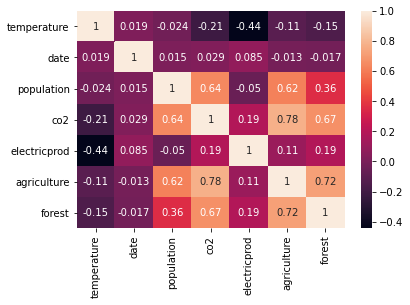

In [56]:
sns.heatmap(df_climate.corr(), annot=True) # annot nos permite ver los valores

In [57]:
df_med = df_climate.groupby('date').median() # El promedio de la temperatura en el mundo 
df_med

,temperature,population,co2,electricprod,agriculture,forest
date,,,,,,
1990,22.7,"10,213,863.0","31,363.9","1,114.7","90,195.0","54,005.0"
1991,22.4,"10,346,663.5","27,343.0","1,072.5","91,870.0","60,307.5"
1992,19.9,"9,188,305.5","26,420.7","1,451.8","89,700.0","45,621.0"
1993,20.6,"9,951,683.5","28,267.1","1,520.3","89,890.0","44,579.0"
1994,20.7,"9,991,525.0","29,640.4","1,576.8","89,150.0","42,572.0"
1995,20.1,"10,026,176.0","29,090.3","1,578.3","81,080.0","41,640.0"
1996,20.2,"10,063,945.0","30,670.8","1,687.1","79,870.0","41,270.0"
1997,20.4,"10,108,977.0","30,623.1","1,762.4","80,120.0","41,270.0"
1998,21.5,"10,069,000.0","31,675.5","1,807.3","80,550.0","40,834.0"


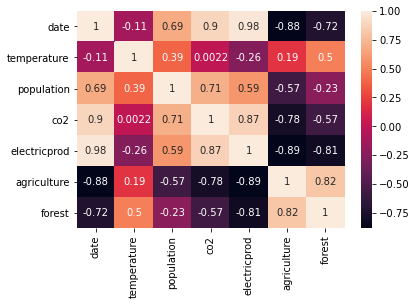

In [58]:
sns.heatmap(df_med.reset_index().corr(),annot=True)

In [59]:
from pandas.plotting import scatter_matrix # 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F48FB6A90>,
      dtype=object)

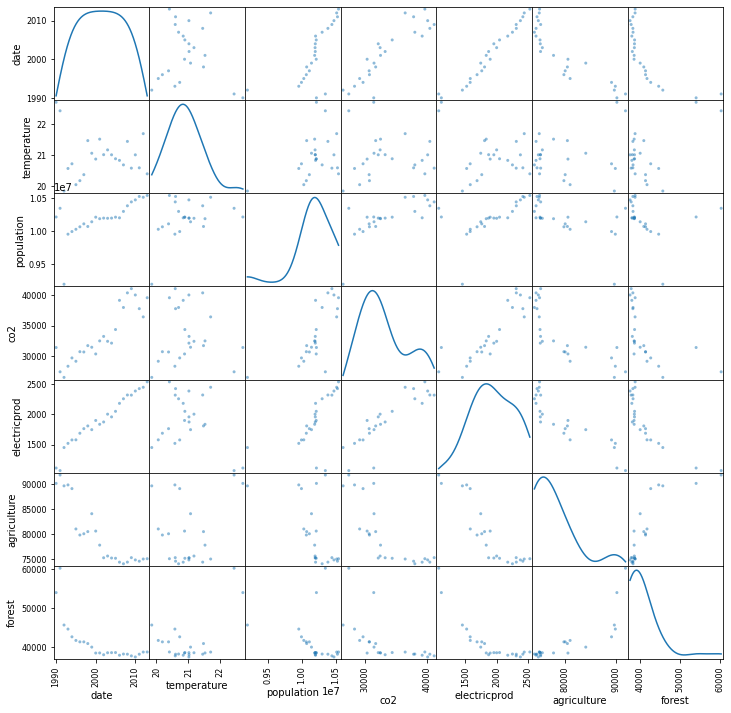

In [62]:
scatter_matrix(df_med.reset_index(),diagonal='kde', figsize = (12,12)) # se realiza un scatter plot entre todas las variables y ella misma, cuando la variable se grafica entre ella misma se produce una distribucion de probabilidad no parametrica 

In [63]:
from pandas.plotting import parallel_coordinates

In [64]:
df_samerica = df_climate[
df_climate['Country'].isin(['Colombia',
     'Argentina',
     'Bolivia',
     'Mexico',
     'Peru',
     'Chile'])
][['Country',
 'temperature',
 'co2',
 'agriculture',
 'forest']]

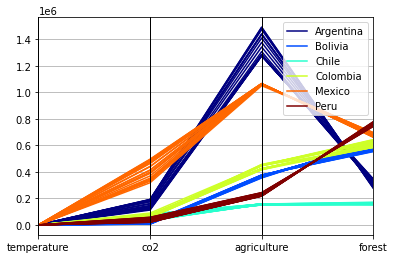

In [67]:
parallel_coordinates(df_samerica, 'Country', colormap = 'jet')

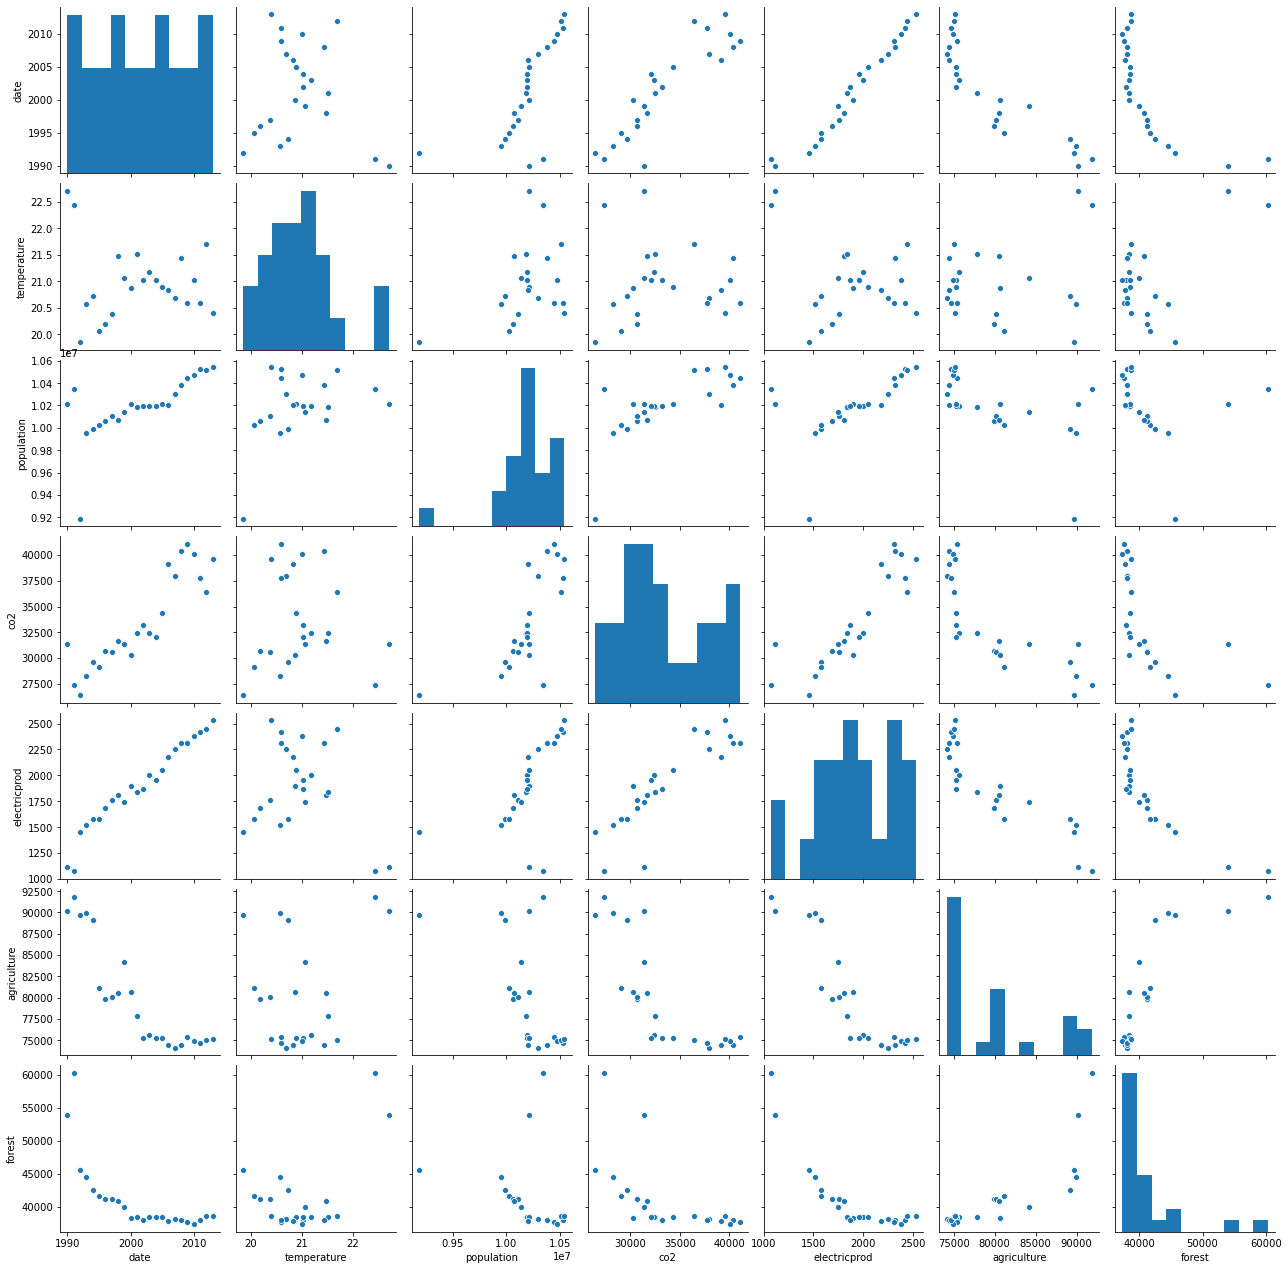

In [68]:
sns.pairplot(df_med.reset_index())